# Receptive field maker example

In [1]:
from data_loader import load_local_data
import networkx as nx
from utils import graph_colors,pos_diff
import matplotlib.pyplot as plt
from pscn import ReceptiveFieldMaker
import numpy as np

Using TensorFlow backend.


#### Load the MUTAG dataset :

In [4]:
mutag_dataset=load_local_data('./data','mutag')
X,y=zip(*mutag_dataset)

X is a list of Graph objects and y the list of the classes

In [5]:
nx_g=X[0].nx_graph

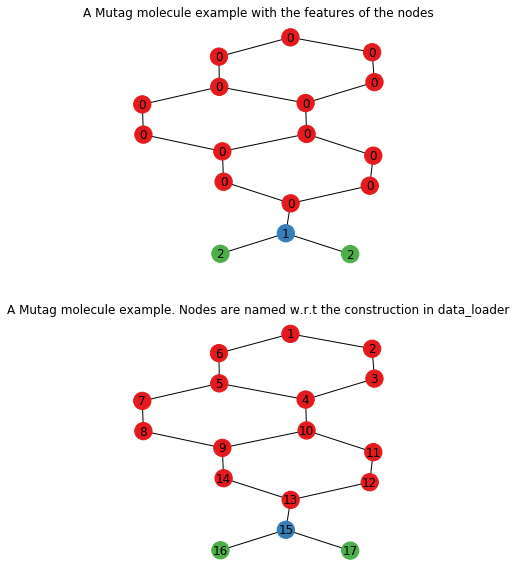

In [6]:
plt.figure(figsize=(5,10))
pos=nx.layout.kamada_kawai_layout(nx_g)
plt.subplot(2,1,1)
nx.draw(nx_g
        ,pos=pos
        ,with_labels=True
        ,labels=nx.get_node_attributes(nx_g,'attr_name') #the features of the nodes are named 'attr_name' by default
       ,node_color=graph_colors(nx_g))
plt.title('A Mutag molecule example with the features of the nodes')
plt.subplot(2,1,2)
nx.draw(nx_g
        ,pos=pos
        ,with_labels=True
       ,node_color=graph_colors(nx_g))
plt.title('A Mutag molecule example. Nodes are named w.r.t the construction in data_loader')
plt.show()

### Receptive field maker example

In [7]:
rf_maker=ReceptiveFieldMaker(nx_g,w=10,k=5)

Using the procedure described in the paper we normalize the graph from the root 15 (for e.g)

In [8]:
nx_normalized=rf_maker.normalize_graph(nx_g,vertex=15)

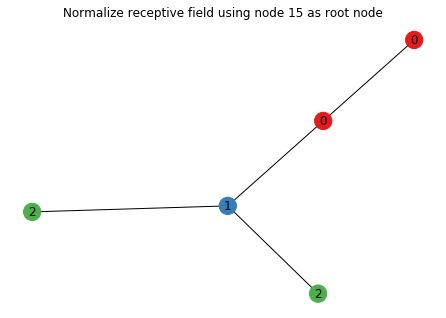

In [9]:
pos=nx.layout.kamada_kawai_layout(nx_normalized)
nx.draw(nx_normalized
        ,pos=pos
        ,with_labels=True
        ,labels=nx.get_node_attributes(nx_normalized,'attr_name')
       ,node_color=graph_colors(nx_normalized))
plt.title('Normalize receptive field using node 15 as root node')
plt.show()

The labeling attribute is the order to respect for the CNN :

In [10]:
nx_normalized.nodes(data=True)

NodeDataView({0: {'attr_name': 0, 'labeling': 2}, 1: {'attr_name': 0, 'labeling': 5}, 2: {'attr_name': 1, 'labeling': 1}, 3: {'attr_name': 2, 'labeling': 3}, 4: {'attr_name': 2, 'labeling': 4}})

We relabel the nodes with respect to the labeling order :

In [11]:
nx_relabel=nx.relabel_nodes(nx_normalized,nx.get_node_attributes(nx_normalized,'labeling'))

The following vector is going to be fed to the 1D-CNN

In [12]:
[x[1] for x in sorted(nx.get_node_attributes(nx_relabel,'attr_name').items(),key=lambda x:x[0])]

[1, 0, 2, 2, 0]

In [13]:
forcnn=rf_maker.make_()

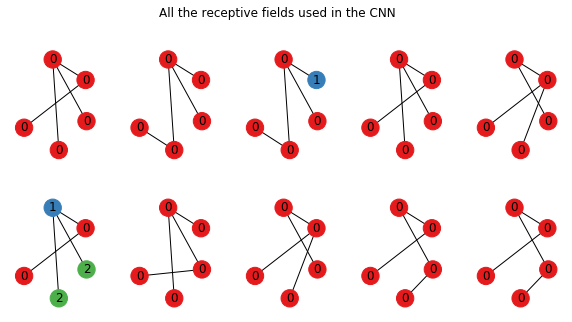

In [14]:
plt.figure(figsize=(10,5))
for i in range(len(rf_maker.all_subgraph)):
    g=rf_maker.all_subgraph[i]
    pos=nx.layout.kamada_kawai_layout(nx_g)
    plt.subplot(2,5,i+1)
    nx.draw(g
            ,pos=pos
            ,with_labels=True
            ,labels=nx.get_node_attributes(g,'attr_name') 
           ,node_color=graph_colors(g))
plt.suptitle('All the receptive fields used in the CNN')
plt.show()

For discrete attributes we rather feed the CNN with the one_hot attributes :

In [15]:
rf_maker=ReceptiveFieldMaker(nx_g,w=10,k=5,one_hot=7) #one_hot is the number of different attributes when they are discrete

In [16]:
rf_maker.make_()

[[array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.])],
 [array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.])],
 [array([1., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.])],
 [array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.])],
 [array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0.])],
 [array([0., 1., 0.,

#### Load dataset with continuous attributes (ex bzr)

In [17]:
bzr_dataset=load_local_data('./data','bzr',attributes=True)
X,y=zip(*bzr_dataset)

In [18]:
lenth=[]
for x in X:
    lenth.append(len(x.nodes()))

In [19]:
nx_g=X[np.argsort(lenth)[0]].nx_graph

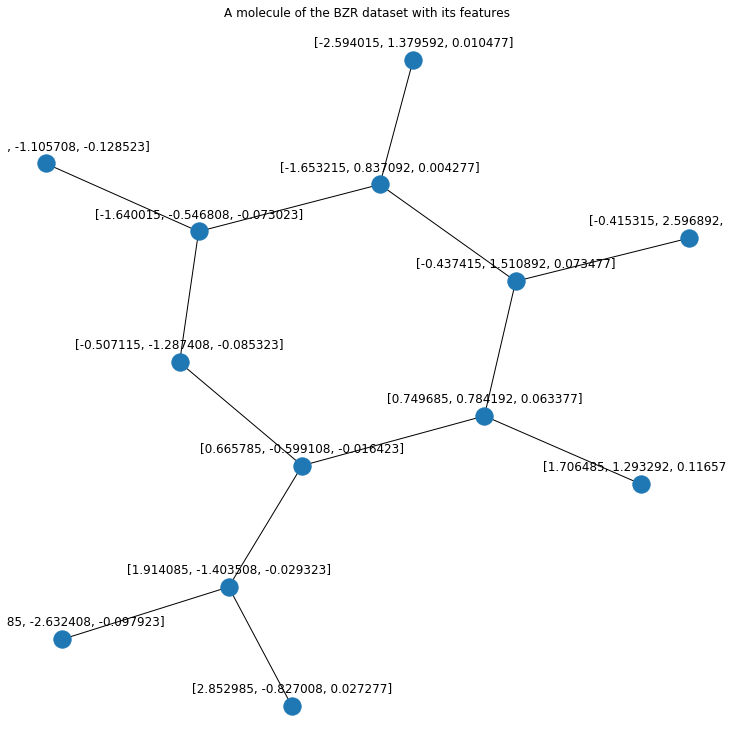

In [20]:
plt.figure(figsize=(10,10))
pos=nx.layout.kamada_kawai_layout(nx_g)
nx.draw(nx_g,pos=pos)
nx.draw_networkx_labels(nx_g,pos=pos_diff(pos,0,0.05)
                        ,labels=nx.get_node_attributes(nx_g,'attr_name'))
plt.title('A molecule of the BZR dataset with its features')
plt.show()

In [21]:
rf_maker=ReceptiveFieldMaker(nx_g,w=3,k=3)

In [22]:
forcnn=rf_maker.make_()

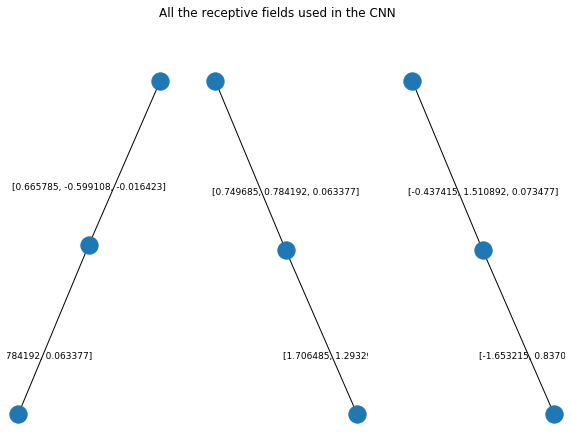

In [23]:
plt.figure(figsize=(10,7))
for i in range(len(rf_maker.all_subgraph)):
    g=rf_maker.all_subgraph[i]
    pos=nx.layout.kamada_kawai_layout(g)
    plt.subplot(1,3,i+1)
    nx.draw(g,pos=pos)
    nx.draw_networkx_labels(g,pos=pos_diff(pos,0,0.2)
                            ,labels=nx.get_node_attributes(g,'attr_name'),font_size=9)
plt.suptitle('All the receptive fields used in the CNN')
plt.show()

In [24]:
forcnn

[[[0.665785, -0.599108, -0.016423],
  [-0.507115, -1.287408, -0.085323],
  [0.749685, 0.784192, 0.063377]],
 [[0.749685, 0.784192, 0.063377],
  [1.706485, 1.293292, 0.116577],
  [0.665785, -0.599108, -0.016423]],
 [[-0.437415, 1.510892, 0.073477],
  [-1.653215, 0.837092, 0.004277],
  [-0.415315, 2.596892, 0.135077]]]

#### Another example with synthetic dataset

In synthetic the features are one dimensionnal

In [25]:
bzr_dataset=load_local_data('./data','synthetic',attributes=True)
X,y=zip(*bzr_dataset)

In [26]:
lenth=[]
for x in X:
    lenth.append(len(x.nodes()))

In [27]:
nx_g=X[np.argsort(lenth)[0]].nx_graph

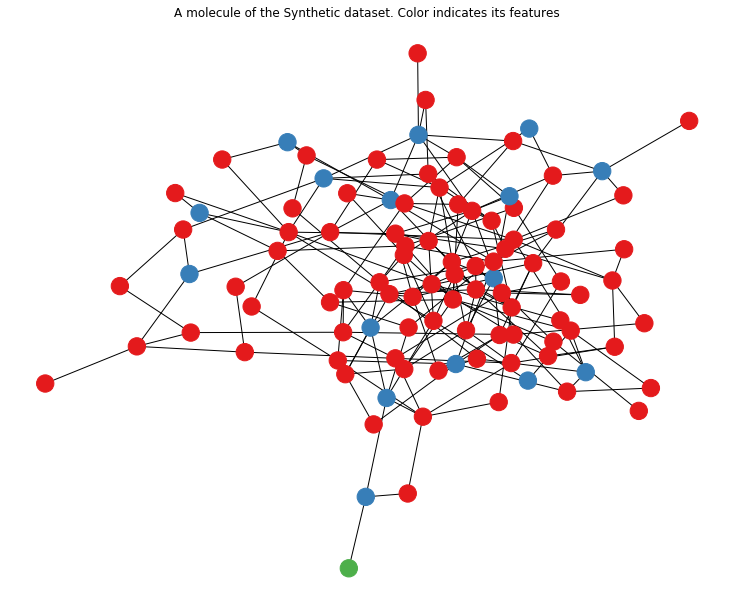

In [28]:
plt.figure(figsize=(10,8))
pos=nx.layout.spring_layout(nx_g,k=1/len(nx_g.nodes())**0.7)
nx.draw(nx_g
        ,pos=pos
        ,with_labels=False
        ,labels=nx.get_node_attributes(nx_g,'attr_name') #the features of the nodes are named 'attr_name' by default
       ,node_color=graph_colors(nx_g))
plt.title('A molecule of the Synthetic dataset. Color indicates its features')
plt.show()

In [29]:
rf_maker=ReceptiveFieldMaker(nx_g,w=6,k=5)

In [30]:
forcnn=rf_maker.make_()

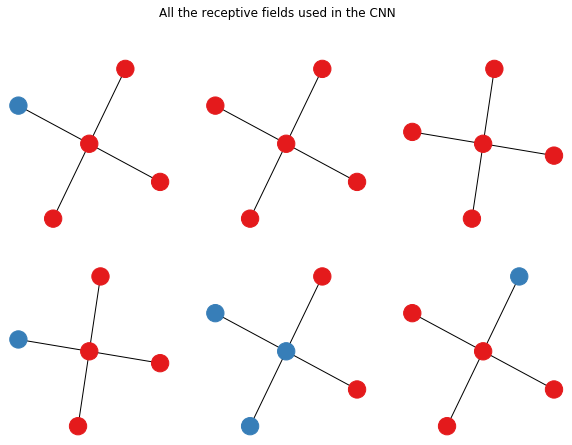

In [31]:
plt.figure(figsize=(10,7))
for i in range(len(rf_maker.all_subgraph)):
    g=rf_maker.all_subgraph[i]
    pos=nx.layout.kamada_kawai_layout(g)
    plt.subplot(2,3,i+1)
    nx.draw(g
            ,pos=pos
            ,with_labels=False
            ,labels=nx.get_node_attributes(g,'attr_name') #the features of the nodes are named 'attr_name' by default
           ,node_color=graph_colors(g))
plt.suptitle('All the receptive fields used in the CNN')
plt.show()

In [32]:
forcnn

[[[0.338394], [0.424464], [-0.84355], [1.533366], [-0.691884]],
 [[-1.581734], [-0.825527], [-2.642633], [0.485737], [-0.640554]],
 [[-0.102897], [-0.173591], [0.424464], [0.798059], [-1.848962]],
 [[-0.215709], [0.487147], [-0.397958], [1.46286], [0.438805]],
 [[1.090341], [-0.102897], [-0.341109], [1.265597], [1.352643]],
 [[0.902598], [-1.368513], [1.352643], [-1.424068], [0.746719]]]